# Simulação de circuito elétrico através de variáveis de estado

O seguinte circuito elétrico RLC será simulado:

![Imagem do circuito](img/electric.png "Circuito RLC")

Com $R=3 \Omega$, $L=1\text{H}$ e $C=1/2\text{F}$, entrada da fonte de corrente $u(t)$ como um sinal degrau unitário e variáveis de estado $x_1 = v_c$ e $x_2 = i_L$

## Diagrama de fluxo

Primeiramente foi pedido para fazer um diagrama de fluxo do circuito acima. Antes do diagrama de fluxo, foi-se obtido o diagrama de blocos no domínio de Laplace para o circuito:

![Diagrama de blocos](img/blockdiagram.png "Diagrama de blocos")

A partir dele, podemos obter o diagrama de fluxo:

![Diagrama de fluxo](img/fluxdiagram.png "Diagrama de fluxo")

## Simulação

### Importar bibliotecas

In [1]:
import argparse
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

### Paramêtros através da linha de comando

In [2]:
# Parse arguments

parser = argparse.ArgumentParser(
    description="Run simulation of RLC circuit"
)

parser.add_argument("-r", "--resistance", type=float, default=3,
                    help="Value of resistance in the circuit in ohms. \
                    Default: 3 ohm")
parser.add_argument("-c", "--capacitance", type=float, default=0.5,
                    help="Value of capacitance in the circuit in farads. \
                    Default: 1/2 F")
parser.add_argument("-i", "--inductance", type=float, default=1,
                    help="Value of inductance in the circuit in henry. \
                    Default: 1 H")

parser.add_argument("--vc0", type=float, default=1,
                    help="Initial vc value. \
                    Default: 0")
parser.add_argument("--il0", type=float, default=1,
                    help="Initial il value. \
                    Default: 0")

parser.add_argument("-u", "--input", type=str, choices=["zero", "step"], 
                    default='zero', 
                    help="Input function of the circuit (Current source) in A. \
                    Default: zero")

parser.add_argument("--step", type=float, default=0.1,
                    help="Time step for simulation in seconds. \
                    Default: 0.1s")

parser.add_argument("--simtime", type=float, default=10,
                    help="Time of simulation in seconds. \
                    Default: 10s")

args = parser.parse_args(''.split())

Caso esteja rodando o script a partir do terminal, trocar a linha logo acima por `args = parser.parse_args()`

In [3]:
R = args.resistance
L = args.inductance
C = args.capacitance
u = args.input
vc0 = args.vc0
il0 = args.il0
dt = args.step
T = args.simtime

#### Mostrar informações ao usuário

In [4]:
print("VARIABLES FOR SIMULATION")
print("R =", R, "ohm")
print("L =", L, "H")
print("C =", C, "F")
print("input = ", u)
print("vc0 =", vc0, "V")
print("il0 =", il0, "A")
print("time step:", dt, "s")
print("timulation time:", T, "s")
print("")

VARIABLES FOR SIMULATION
R = 3 ohm
L = 1 H
C = 0.5 F
input =  zero
vc0 = 1 V
il0 = 1 A
time step: 0.1 s
timulation time: 10 s



### Simular o sistema

In [5]:
# condições iniciais
x0 = np.array([vc0, il0])

# matrizes para espaço de estados contínuo
A = np.array([[0, -1/C], [1/L, -R/L]])
B = np.array([[1/C], [0]])
# Ajustar C e D para a saída ser as variáveis de estado
C = np.array([[1, 0], [0, 1]])
D = np.array([[0], [0]])

# Gerar array de tempo
t = np.arange(0, T+dt, dt)

# Sistema Contínuo
contsys = signal.lti(A, B, C, D)
# Discretizar o sistema
sys = contsys.to_discrete(dt)

# Obter resposta ao degray
if u == "zero":
    
    U = np.zeros(t.shape)
    
    t, y, x = sys.output(U, t, x0=x0)
    x1 = x[:, 0]
    x2 = x[:, 1]
    
elif u == "step":

    t, y = sys.step(t=t, x0=x0)
    t = np.array(t)
    y = np.array(y)
    x1 = y[0,:,0]
    x2 = y[0,:,1]

### Plotar resultados

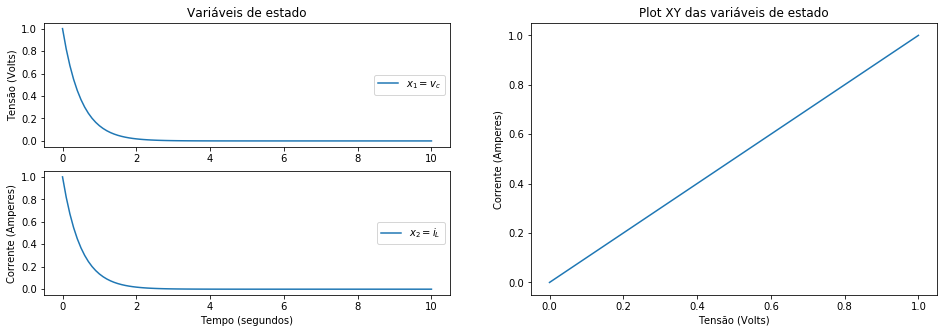

In [6]:
plt.close('all')

plt.figure(figsize=(16,5))

# Dois plots que compartilham o mesmo eixo x

ax1 = plt.subplot2grid((2,2), (0, 0))
ax1.plot(t, x1, label="$x_1 = v_c$")
ax1.legend(loc='center right')
ax1.set_title('Variáveis de estado')
ax1.set_ylabel('Tensão (Volts)')

ax2 = plt.subplot2grid((2,2), (1, 0))
ax2.plot(t, x2, label="$x_2 = i_L$")
ax2.set_ylabel('Corrente (Amperes)')
ax2.set_xlabel('Tempo (segundos)')
ax2.legend(loc='center right')

ax3 = plt.subplot2grid((2,2), (0, 1), rowspan=2)
ax3.plot(x1, x2)
ax3.set_title('Plot XY das variáveis de estado')
ax3.set_ylabel('Corrente (Amperes)')
ax3.set_xlabel('Tensão (Volts)')

plt.show()